In [1]:
import neat
import os
import evogym.envs
from evogym import is_connected, has_actuator, get_full_connectivity, hashable
import numpy as np
import dill
import pickle as pkl
import sys
sys.path.append('../')

from hyperneat.new_hyperNEAT import create_phenotype_network
from hyperneat.substrate import Substrate
from hyperneat.visualize import draw_net
from dynamic_env.traverser import DynamicObstacleTraverser


import itertools as it
import time
import imageio

from matplotlib import pyplot as plt


from sgr.substrates import morph_substrate, control_substrate
from sgr.generate_robot import generate_robot, eval_robot_constraint
from sgr.evogym_sim import simulate_env
from sgr.body_speciation import CustomGenome


In [2]:
def get_robot(genome, robot_size, neat_config):
    if genome.robot is not None:
        robot = genome.robot
    else:
        cppn = neat.nn.FeedForwardNetwork.create(genome, neat_config)
        design_substrate = morph_substrate(robot_size)
        design_net = create_phenotype_network(cppn, design_substrate)
        robot = generate_robot(design_net, robot_size)
        print(robot)

    if not eval_robot_constraint(robot):
        return robot, None
    connections = get_full_connectivity(robot)

    
    env = DynamicObstacleTraverser(body=robot, connections=connections, filename="../dynamic_env/env.json")
    img = env.render(mode='img')
    env.close()
    return robot, img

In [3]:
# STEPS = 400
# ROBOT_SIZE = 5
# POP = 48

# directory = "results/" + ENV

# params = {"robot_size": ROBOT_SIZE, "env": "dynamic", "steps": STEPS, "pop_size": POP}

# morphology_coords = morph_substrate(ROBOT_SIZE)
# CustomGenome.robot_func = lambda self, net, params: generate_robot(net, ROBOT_SIZE)
# CustomGenome.substrate = morphology_coords
# CustomGenome.robot_size = ROBOT_SIZE


# neat_config = neat.config.Config(
#     CustomGenome,
#     neat.reproduction.DefaultReproduction, 
#     neat.species.DefaultSpeciesSet, 
#     neat.stagnation.DefaultStagnation, 
#     "../neat_configs/POET.cfg"
# )

# input_size = morphology_coords.dimensions*2 + 1 # two coordinates plus the bias
# neat_config.genome_config.num_inputs = input_size
# neat_config.genome_config.input_keys = [-1*i for i in range(1, input_size+1)]
# neat_config.genome_config.num_outputs = 1
# neat_config.genome_config.output_keys = [1]

with open(f"../poet/cp_cppn_gen_375.pkl", "rb") as file:
    poet_pop = pkl.load(file)



###################### Pair (22, 0) ########################

9460 2.029139565133292


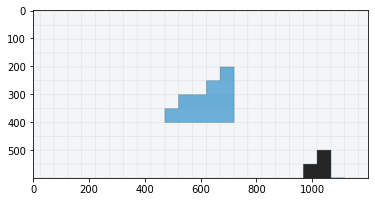

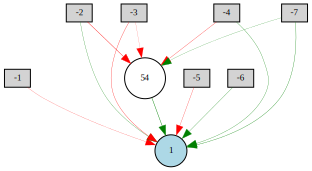

9588 2.028973740490843


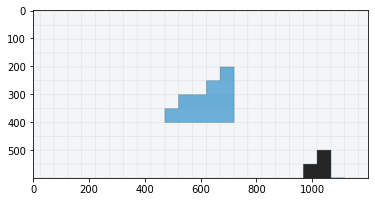

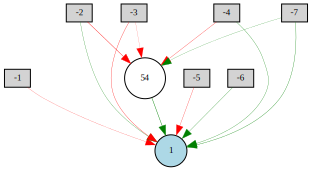

9405 2.4434393671915142


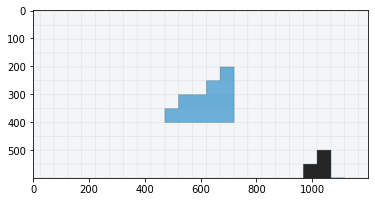

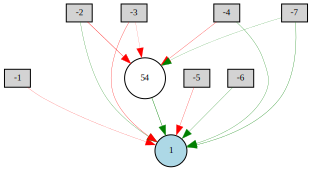

9459 2.054126370843075


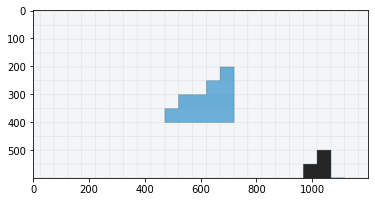

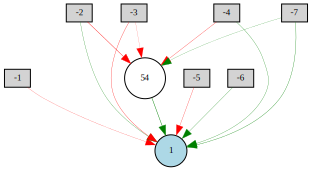

8975 4.2561578632410075


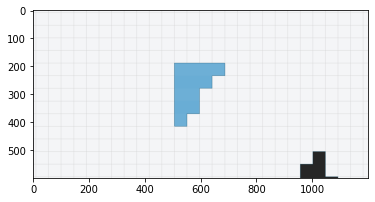

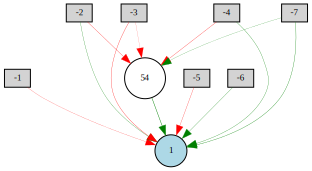

9516 4.2561578632410075


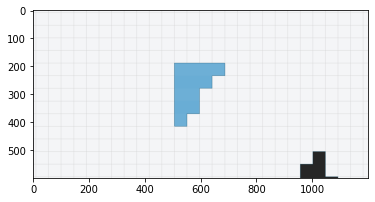

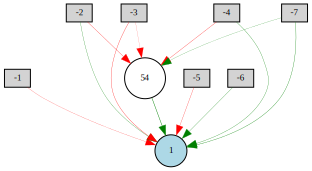



###################### Pair (23, 0) ########################

9395 4.436388532300169


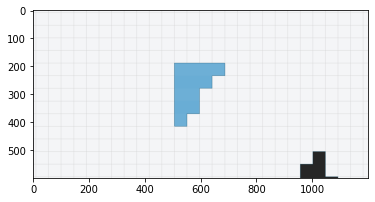

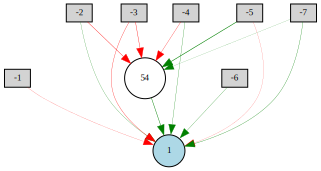

9498 4.436388532300169


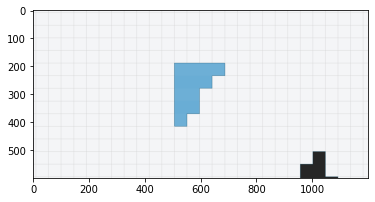

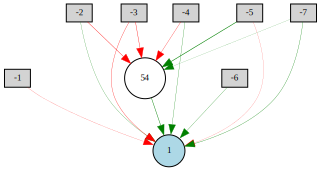



###################### Pair (26, 0) ########################



###################### Pair (30, 0) ########################

9481 2.175177017356739


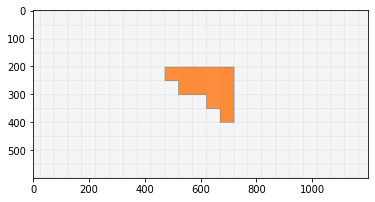

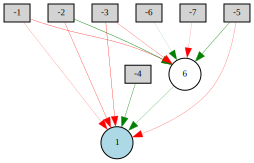



###################### Pair (32, 0) ########################



###################### Pair (31, 0) ########################



###################### Pair (34, 54) ########################

11307 4.693589072881566


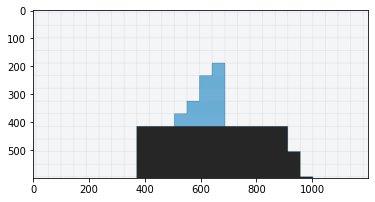

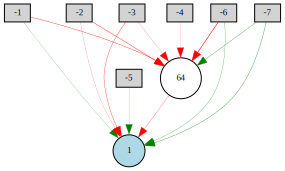

11208 4.693589072881566


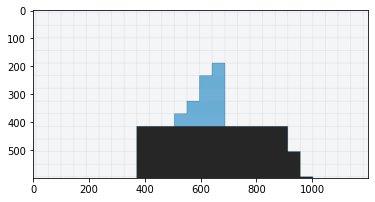

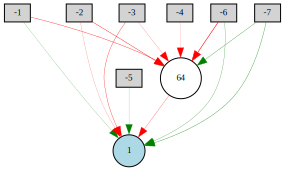

11280 7.588619278036993


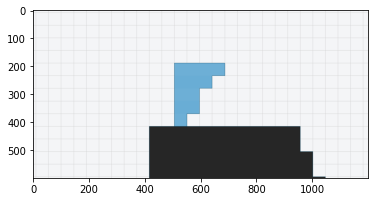

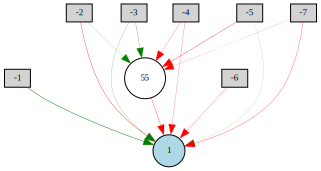

11287 7.588619278036993


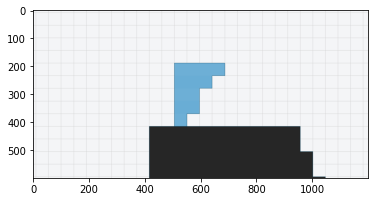

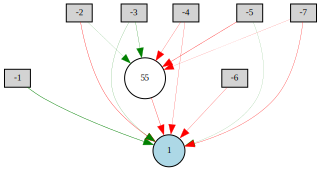



###################### Pair (37, 0) ########################

9776 3.4203444396739426


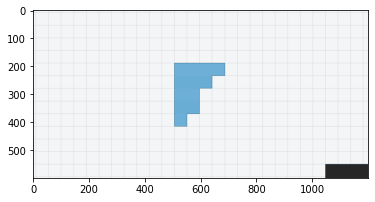

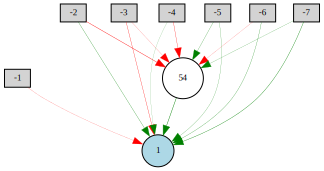

9805 3.416572608184232


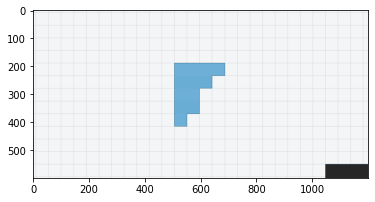

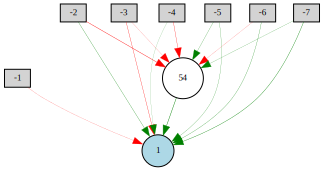



###################### Pair (43, 0) ########################



###################### Pair (44, 0) ########################

9673 2.8655027805343822


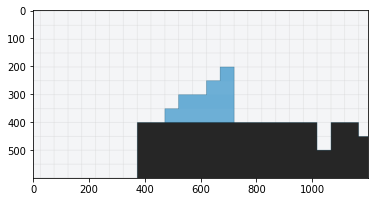

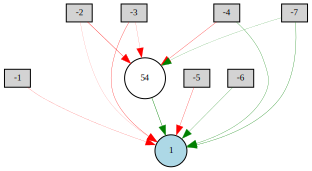

9737 2.7894292278400594


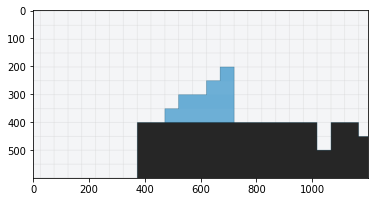

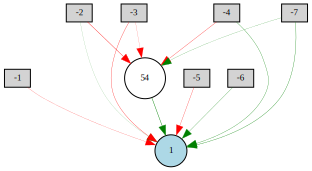

9760 3.320245397872828


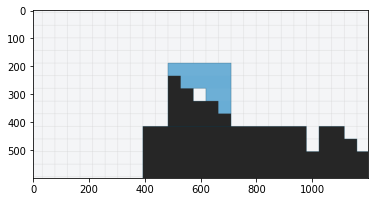

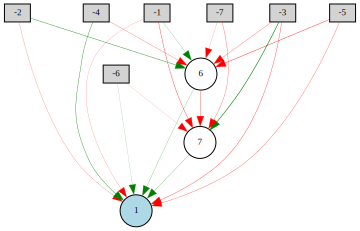

9739 3.1644297510195876


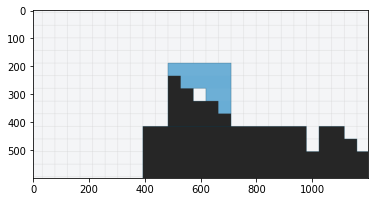

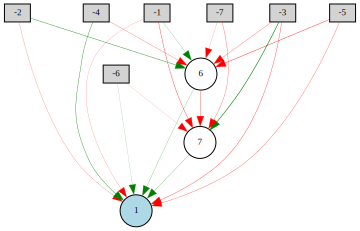

9339 3.7340331175886945


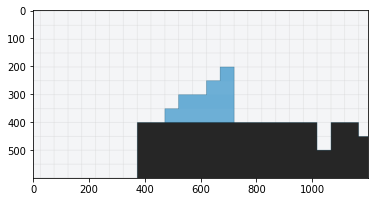

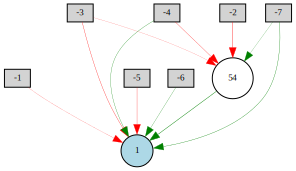

9470 3.653633428424997


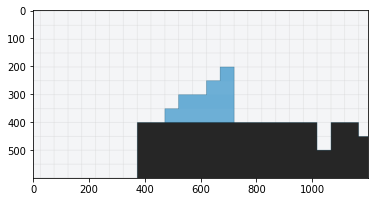

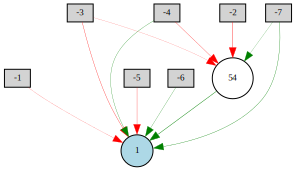

9518 4.341751130826696


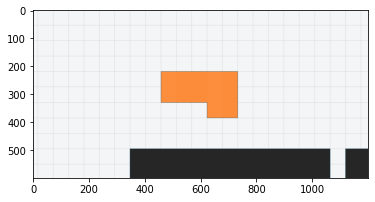

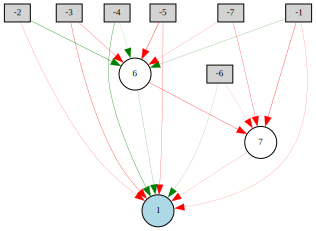

9682 3.8469923001685995


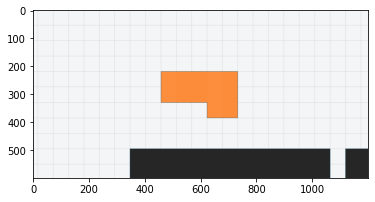

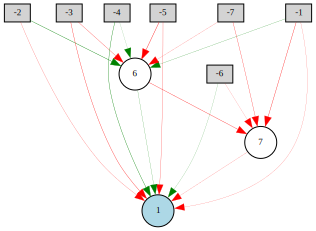

9423 4.3571218919183


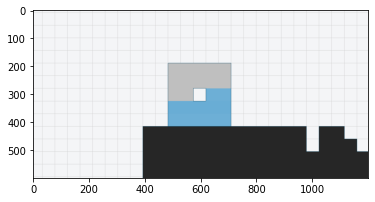

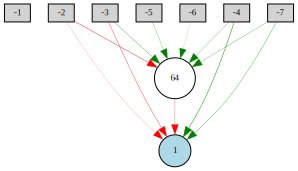

9685 3.7463336716660662


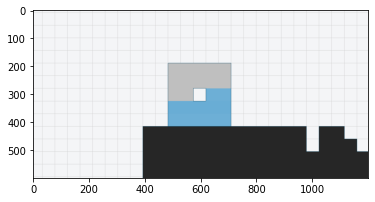

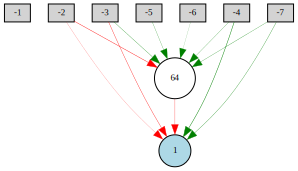



###################### Pair (45, 0) ########################



###################### Pair (48, 0) ########################



###################### Pair (57, 878) ########################

9736 2.021339365641298


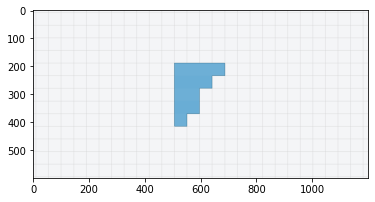

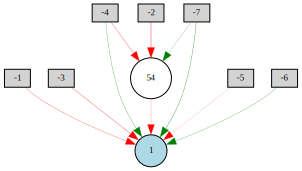

9677 2.1224528095032396


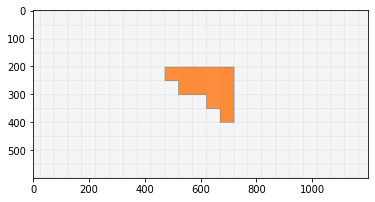

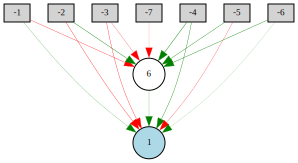

9740 2.1224528095032396


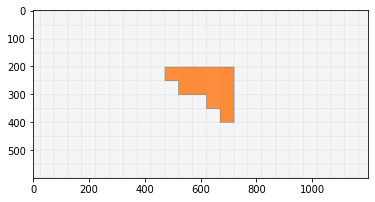

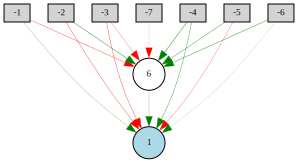



###################### Pair (60, 986) ########################

9610 2.3122180877756775


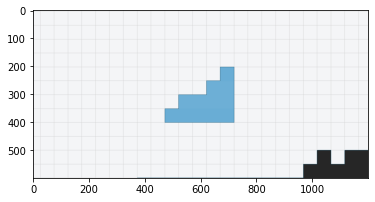

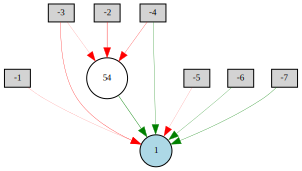

9728 2.3122180877756775


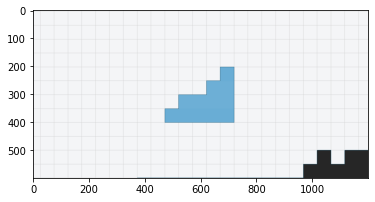

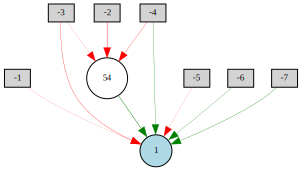

9532 2.3122180877756775


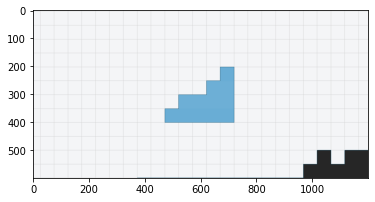

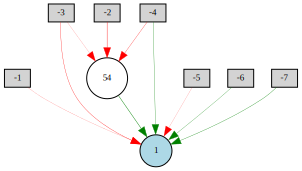

9729 2.3122180877756775


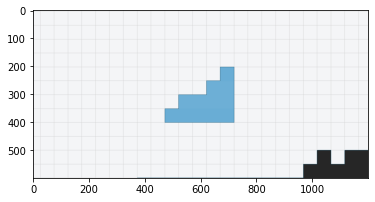

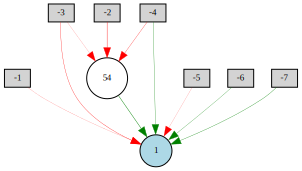



###################### Pair (51, 0) ########################

9654 3.4671919576419565


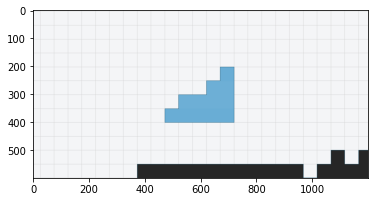

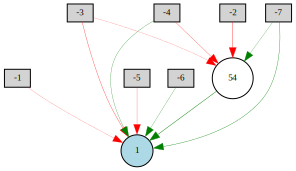

8815 4.0365557778117545


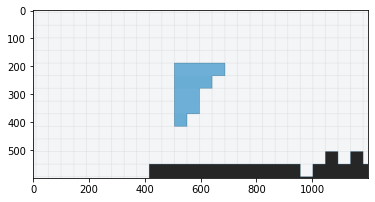

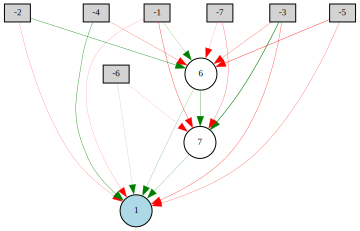

9683 4.029806457259978


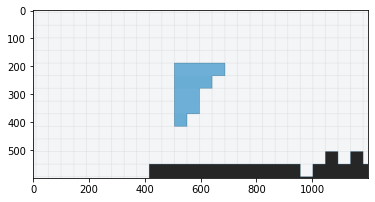

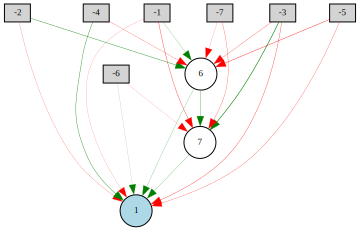



###################### Pair (55, 806) ########################

9275 3.1729687269678877


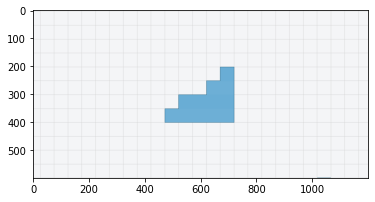

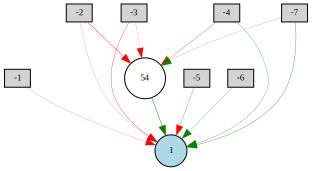

9608 4.410406915021965


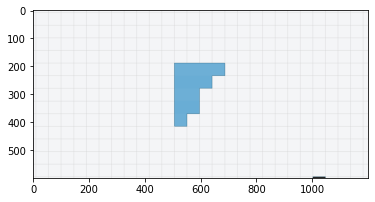

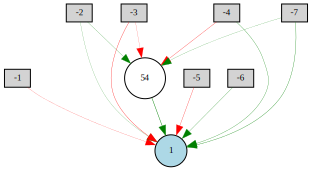

9588 4.270676914848306


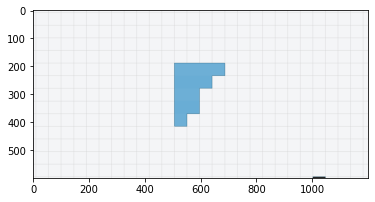

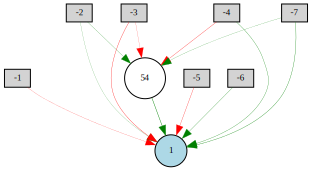



###################### Pair (70, 1382) ########################



###################### Pair (64, 1142) ########################



###################### Pair (61, 1022) ########################

9807 2.0827868176343207


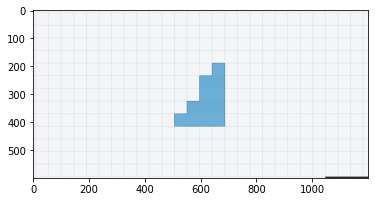

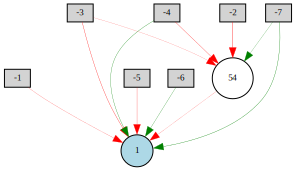

9826 2.0827868176343207


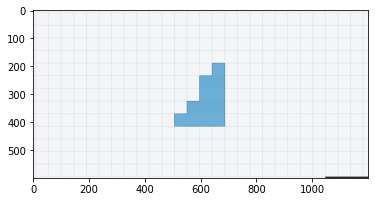

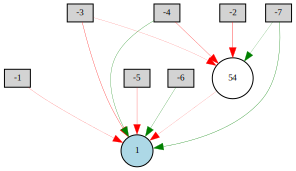

9768 2.2379055713086773


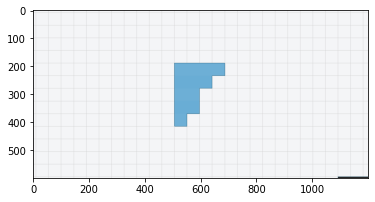

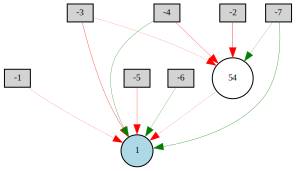

9730 2.2379055713086773


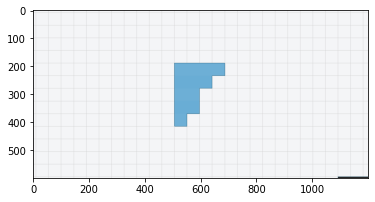

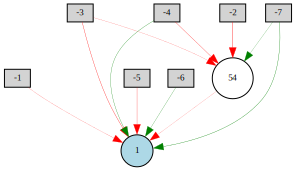

9727 2.4776994910777317


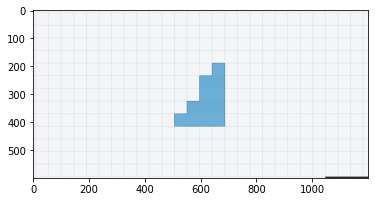

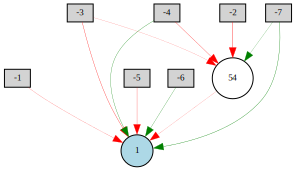

9824 2.4479793188679824


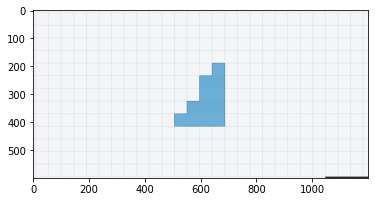

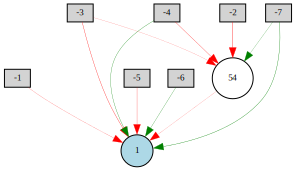



###################### Pair (69, 1342) ########################



In [10]:
for p in poet_pop.pairs:
    pop = p.agent_pop
    env = p.environment
    print(f"\n\n###################### Pair ({env.id}, {pop.id}) ########################\n")
    env.generate_json("env.json")
    for ag_id, ag in pop.pop.population.items():
        if ag.fitness is not None and ag.fitness > 2:
            r, img = get_robot(ag, pop.robot_size, pop.neat_config)
            if img is not None:
                print(ag.key, ag.fitness)
                plt.imshow(img)
                plt.show()
                net = neat.nn.FeedForwardNetwork.create(ag, pop.neat_config)
                display(draw_net(net))

In [4]:
STEPS = 400
env_dict = {}
ag_dict = {}
for p in poet_pop.pairs:
    pop = p.agent_pop
    env = p.environment
    for ag_id, ag in pop.pop.population.items():
        ag_dict[ag_id] = (ag, pop)
    env_dict[env.id] = env



In [5]:
def show_exec(ag_id, env_id):
    env_dict[env_id].generate_json("env.json")
    ag, pop = ag_dict[ag_id]
    reward, done = pop.single_genome_fit(ag, STEPS, "dynamic", True, None)
    return reward, done

In [18]:
r, d = show_exec(9610, 60)
print(r)

2.3122180877756775


In [6]:
import time
for p in poet_pop.pairs:
    s = time.time()
    pop = p.agent_pop
    env = p.environment
    print(f"\n\n###################### Pair ({env.id}, {pop.id}) ########################\n")
    env.generate_json("env.json")
    for ag_id, ag in pop.pop.population.items():
        reward, done = pop.single_genome_fit(ag, STEPS, "dynamic", False, None)
        print(ag_id, reward)
    print(time.time() - s, "s")



###################### Pair (22, 0) ########################

9575 0.24967188548001967
9522 0.22471747718835838
9632 0.6628173492193329
9633 0.21449785240598157
9634 0.09976514177172646
9503 0.33154960965331604
9240 0.317154100219708
9635 -0.34017325828327877
9636 0.2968694693174613
9637 -0.10858901384800229
9054 0.4425472865138731
9415 0.43604057342508273
9638 0.21910670581654945
9639 0.17937777674910904
9106 0.4454413866829604
9227 0.4450421479141289
9640 -10000
9641 0.35695537534271216
9331 0.5121468994154712
9603 0.5121468994154712
9642 0.5085559669690258
9643 0.26364128963108446
9460 2.029139565133292
9588 2.028973740490843
9644 1.430319241450068
9645 1.5621196991420705
9405 2.4434393671915142
9459 2.054126370843075
9646 0.05354646650914807
9647 0.15243496446281257
8975 4.2561578632410075
9516 4.2561578632410075
9648 4.070199514558711
9649 4.17715609987588
97.07106614112854 s


###################### Pair (23, 0) ########################

9667 0.18492591066034986
9664 0.01478401

KeyboardInterrupt: 